average:  27343.75
range  :  26861 ~ 27873


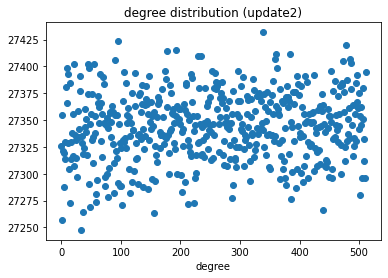

average:  27343.75
range  :  26825 ~ 27857


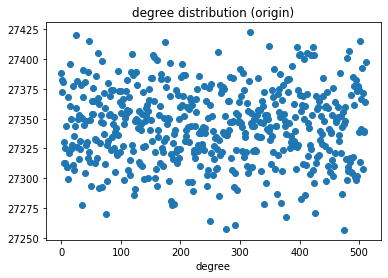

average:  25781.25
range  :  25222 ~ 26340


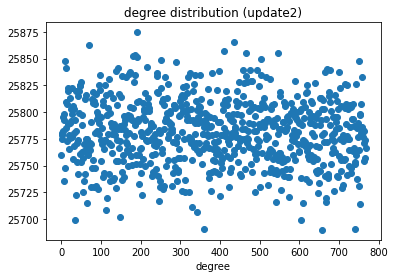

average:  25781.25
range  :  25283 ~ 26373


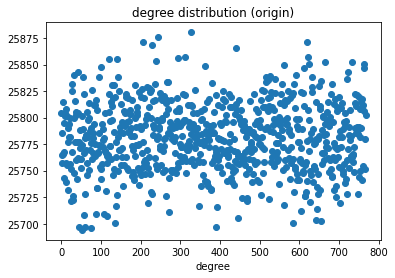

average:  13750.0
range  :  13254 ~ 14176


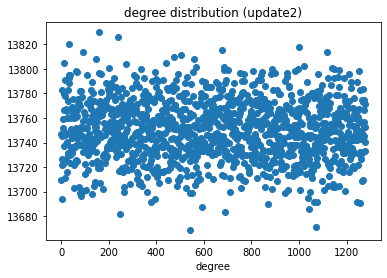

average:  13750.0
range  :  13316 ~ 14183


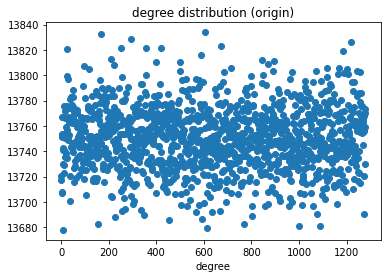

In [2]:
# --------------- total degree distribution --------------- #
# - after duplicate prevention
# - input is the set of count of the each coeff (degree)

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

NSAMPLE = 20
# path = "../build/bin/"
path = "./sample/cnt-deg-0831/"

def load_data(filepath):
    data = [0 for i in range(NSAMPLE)]
    with open(filepath, "r") as txt_file:
        meta_line = txt_file.readline()
        meta = [int(n) for n in meta_line.strip().split()]
        for i in range(NSAMPLE):
            data_line = txt_file.readline()
            data[i] = [int(n) for n in data_line.strip().split()]
    return meta, data


def dist_plot(data, idx, bin_num, x_label="idx", title="distribution", hist=False):
    if(hist):
        # sb.distplot(data, x= idx, kde = False)
        sb.histplot(data, x=idx, color='skyblue', alpha=0.7,
                    edgecolor='white', bins=bin_num)
    else:
        plt.scatter(range(len(data)), data, marker='o')
    plt.xlabel(x_label)
    plt.title(title)
    plt.show()


def deg_dist_analysis(filepath, cnt=False, ver = ""):
    data = [0 for i in range(NSAMPLE)]
    (meta, data) = load_data(filepath)

    hwt = meta[0]
    ntests = meta[1]
    dimension = meta[2]
    average = (hwt*ntests)/dimension
    max = np.max(data)
    min = np.min(data)
    print("average: ", average)
    print("range  : ", min, "~", max)

    deg_dist = [0 for i in range(len(data[0]))]
    deg_idx = [int(i) for i in range(len(data[0]))]
    for i in range(NSAMPLE):
        deg_dist = np.array(deg_dist) + np.array(data[i])
    deg_dist = deg_dist/NSAMPLE

    if(cnt):
        dist_plot(deg_dist, deg_idx, dimension,
                  "poly section (rank)", "cnt distribution"+ver)
    else:
        dist_plot(deg_dist, deg_idx, dimension,
                  "degree", "degree distribution"+ver)


# hwt sampling version
v0 = " (origin)"
v1 = " (update1)"
v2 = " (update2)"

# SMAUG degree distribution
# deg_dist_analysis(path+"smaug1-deg-dist-update".txt", ver = v1)
deg_dist_analysis(path+"smaug1-deg-dist-update-2.txt", ver = v2)
deg_dist_analysis(path+"smaug1-deg-dist-origin.txt", ver = v0)

# deg_dist_analysis(path+"smaug3-deg-dist-update.txt", ver = v1)
deg_dist_analysis(path+"smaug3-deg-dist-update-2.txt", ver = v2)
deg_dist_analysis(path+"smaug3-deg-dist-origin.txt", ver = v0)

# deg_dist_analysis(path+"smaug5-deg-dist-update.txt", ver = v1)
deg_dist_analysis(path+"smaug5-deg-dist-update-2.txt", ver = v2)
deg_dist_analysis(path+"smaug5-deg-dist-origin.txt", ver = v0)

# SMAUG count array distribution
# deg_dist_analysis(path+"smaug1-deg-cnt-update.txt", cnt=True, ver = v1)
# deg_dist_analysis(path+"smaug1-deg-cnt-update-2.txt", cnt=True, ver = v2)
# deg_dist_analysis(path+"smaug1-deg-cnt-origin.txt", cnt=True, ver = v0)

# deg_dist_analysis(path+"smaug3-deg-cnt-update.txt", cnt=True, ver = v1)
# deg_dist_analysis(path+"smaug3-deg-cnt-update-2.txt", cnt=True, ver = v2)
# deg_dist_analysis(path+"smaug3-deg-cnt-origin.txt", cnt=True, ver = v0)

# deg_dist_analysis(path+"smaug5-deg-cnt-update.txt", cnt=True, ver = v1)
# deg_dist_analysis(path+"smaug5-deg-cnt-update-2.txt", cnt=True, ver = v2)
# deg_dist_analysis(path+"smaug5-deg-cnt-origin.txt", cnt=True, ver = v0)